In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, f1_score, recall_score, precision_score, log_loss
from sklearn.model_selection import train_test_split

Load the data and drop the column 'Satisfaction.Score'

In [2]:
Churn_data = pd.read_csv('churn_final.csv')

In [4]:
Churn_data = Churn_data.drop('Satisfaction.Score', axis = 1)
Churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn', 'Age', 'City'],
      dtype='object')

Identifying categorical columns and Removing 'Churn' from categorical columns as it's the target variable

In [5]:
categorical_columns = Churn_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('Churn')

Apply one-hot encoding

In [6]:
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

In [7]:
X = column_transformer.fit_transform(Churn_data.drop(['Churn'], axis=1))
y = Churn_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) 
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Train the model
svm_model = SVC(probability=True, random_state=0)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=0)

Evaluate on the testing set

In [9]:
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
y_pred = svm_model.predict(X_test)

# evaluation metrics
auc_score = roc_auc_score(y_test, y_pred_proba)
ber_score = 1 - balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"AUC score: {auc_score:.4f}")
print(f"BER score: {ber_score:.4f}")
print(f"F1 score: {f1:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"Precision score: {precision:.4f}")
print(f"Log loss: {logloss:.4f}")

AUC score: 0.7992
BER score: 0.3253
F1 score: 0.5199
Recall score: 0.4209
Precision score: 0.6797
Log loss: 0.4669


In [10]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy:.4f}")


Accuracy score: 0.7939


In [11]:
svm_model = SVC(probability=True, random_state=44) # Define the SVM model

In [12]:
# CV 
from sklearn.model_selection import GridSearchCV, KFold
folds = KFold(n_splits=5, shuffle=True, random_state=14)

In [26]:
hyper_params = { 
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

GridSearchCV
CV_svm = GridSearchCV(estimator=svm_model, 
                      param_grid=hyper_params, 
                      cv=folds, 
                      scoring='roc_auc',
                      n_jobs=-1,
                      verbose=10)
CV_svm.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=14, shuffle=True),
             estimator=SVC(probability=True, random_state=44), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='roc_auc', verbose=10)

In [27]:
best_params = CV_svm.best_params_

Use the best parameters

In [28]:
svm_best = SVC(probability=True, random_state=10, **best_params)
svm_best.fit(X_train, y_train)

SVC(C=0.1, gamma='auto', kernel='poly', probability=True, random_state=10)

In [16]:
svm_best = SVC(probability=True, random_state=10)
svm_best.fit(X_train, y_train)

SVC(probability=True, random_state=10)

prediction

In [29]:
y_pred_proba = svm_best.predict_proba(X_test)[:, 1]
y_pred = svm_best.predict(X_test)

# evaluation metrics
auc_score = roc_auc_score(y_test, y_pred_proba)
ber_score = 1 - balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"AUC score: {auc_score:.4f}")
print(f"BER score: {ber_score:.4f}")
print(f"F1 score: {f1:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"Precision score: {precision:.4f}")
print(f"Log loss: {logloss:.4f}")

AUC score: 0.8176
BER score: 0.3260
F1 score: 0.5185
Recall score: 0.4129
Precision score: 0.6968
Log loss: 0.4516


In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy:.4f}")

Accuracy score: 0.7967


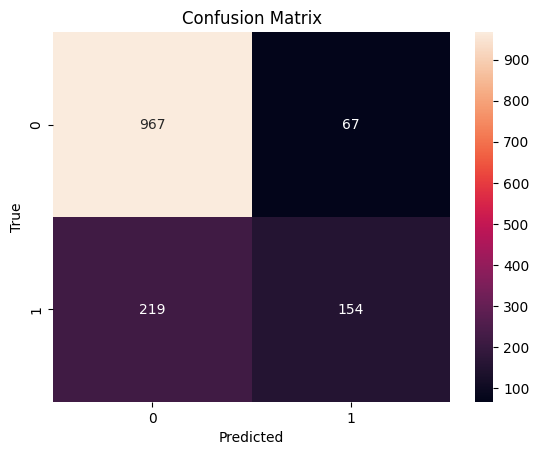

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have test data (X_test, y_test) and a trained model 'svm_best'
y_pred = svm_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [36]:
from sklearn.metrics import roc_curve, auc
y_prob = svm_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

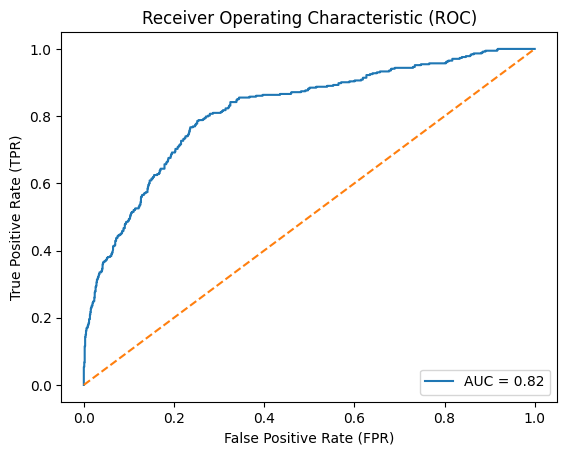

In [37]:
# Plot ROC
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], '--') 
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# RUN HERE

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, f1_score, recall_score, precision_score, log_loss
from sklearn.model_selection import train_test_split

# import some data to play with
Churn_data = pd.read_csv("churn_final.csv")
Churn_data = Churn_data.drop(['Satisfaction.Score', 'City'], axis = 1)
categorical_columns = Churn_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('Churn')
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)


X = column_transformer.fit_transform(Churn_data.drop(['Churn'], axis=1))
y = Churn_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) 
X = X[:, 35:37]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = y

h = 0.5  # step size in the mesh

C = .1  # SVM regularization parameter

In [42]:
X[0,:]

array([ 9. , 65.6])

In [43]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
print(xx.shape, yy.shape)

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']



Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)



(205, 146) (205, 146)


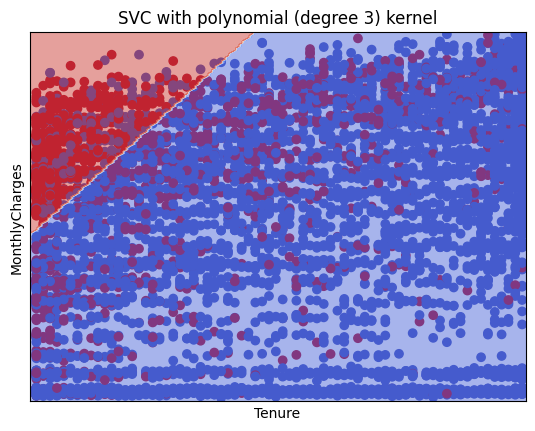

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Tenure')
plt.ylabel('MonthlyCharges')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles[3])
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)

plt.show()